In [2]:
import os
import glob
import datetime
import numpy as np
from astropy.io import fits
from photutils import DAOStarFinder, CircularAperture
import photutils.psf
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch, AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import peak_widths
import astropy.units as u
import pandas as pd
from scipy import stats
from calibFuncs import * #sortData, starLocate, nircEPSF, calcBinDist

In [2]:
datadir = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium'
NIRC2_datasets = sortData(datadir, instrument='NIRC2', filesufx='*.fit*')

  2%|█▋                                                                                | 3/145 [00:00<00:05, 26.40it/s]

sorting individual images


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]

sorting unique datasets into lists


In [3]:
uniques = sortData(datadir, instrument='NIRC2', filesufx='*.fit*', returntab=True)

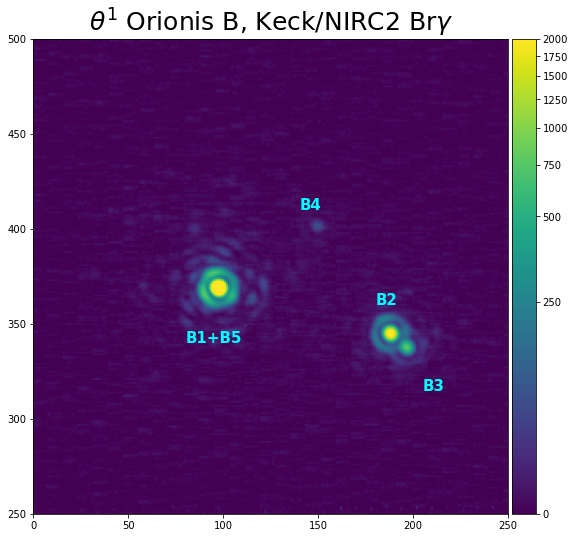

In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(9,9))
ax = plt.gca()

data, head = fits.getdata(NIRC2_datasets[14][3], header=True)
wave = head['FWONAME']
if wave == 'Br_gamma':
    wave = 'Br$\gamma$'

im = ax.imshow(data, norm=ImageNormalize(stretch=AsinhStretch(a=0.05), vmin=0, vmax=2000), origin='lower')
ax.set_xlim(0,250)
ax.set_ylim(250,500)
plt.annotate(xy=[80,340], s='B1+B5', c='cyan', size=15, weight='bold')
plt.annotate(xy=[140,410], s='B4', c='cyan', size=15, weight='bold')
plt.annotate(xy=[180,360], s='B2', c='cyan', size=15, weight='bold')
plt.annotate(xy=[205,315], s='B3', c='cyan', size=15, weight='bold')
plt.title(r'$\theta^1$ Orionis B, Keck/NIRC2 '+wave, size=25)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig('tet1oriB_NIRC2.png', dpi=150, transparent=True)


In [52]:
len(NIRC2_datasets)

16

25
Choose a reference star image to create a reference PSF from


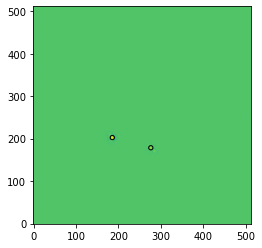

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
276.13705556551054 178.54573597636835 0.026452785640125046
 185.4720015528101  202.5813237105203  0.06461974728134616
input the 0 indexed integer of your target from the table above: 1
target star is at  185 , 202  at FWHM 4.423224251737963


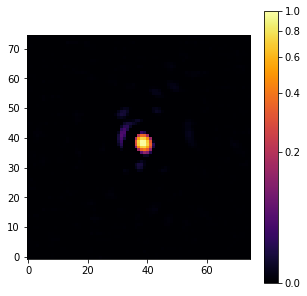

Select your target system to fit positions to


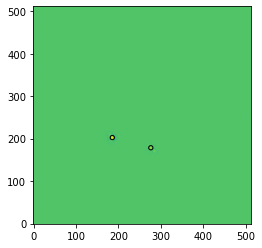

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
276.13705556551054 178.54573597636835 0.026452785640125046
 185.4720015528101  202.5813237105203  0.06461974728134616
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.312713527248263
Stars found at positions
       x_0                y_0       
------------------ -----------------
 38.28067833992604  38.2554644832292
46.996248022887855 30.91052781489006
Choose a reference star image to create a reference PSF from


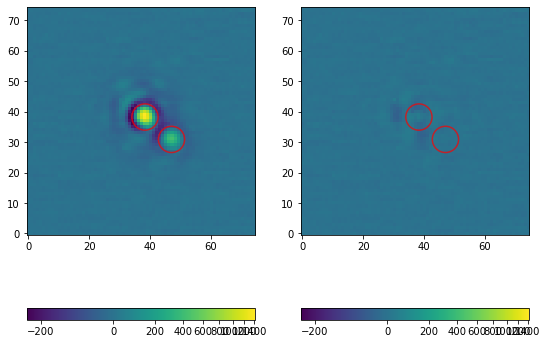

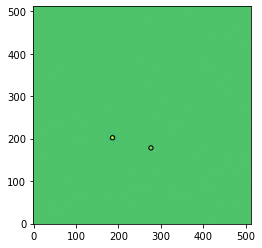

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.4520295793779 178.27985879786655    0.12390949058486
185.93671684655382 202.23409010357528 0.10864635240513819
input the 0 indexed integer of your target from the table above: 1
target star is at  185 , 202  at FWHM 4.3465286847291225


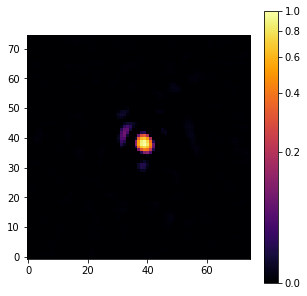

Select your target system to fit positions to


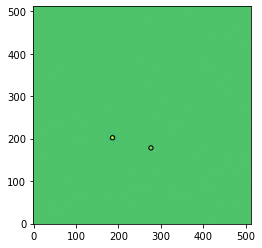

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.4520295793779 178.27985879786655    0.12390949058486
185.93671684655382 202.23409010357528 0.10864635240513819
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.309159323874326
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.60153885191321  38.13538089377403
47.27434516609603 30.860407772546534
Choose a reference star image to create a reference PSF from


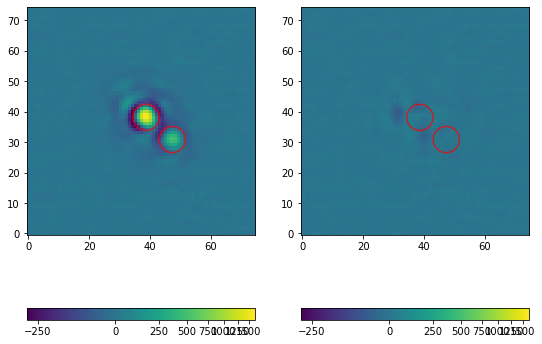

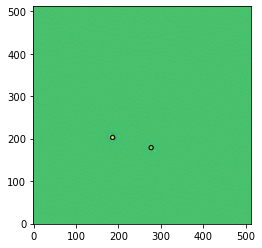

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.8769153228861 178.80210896050343 0.05220397351373162
186.24305499233935 202.85992345413408  0.0406297597081758
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.410496382771214


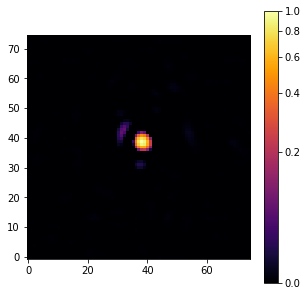

Select your target system to fit positions to


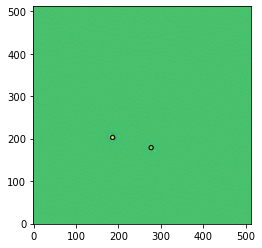

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.8769153228861 178.80210896050343 0.05220397351373162
186.24305499233935 202.85992345413408  0.0406297597081758
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.4154370092770705
Stars found at positions
       x_0                y_0        
------------------ ------------------
38.946761986282354  38.70610415190636
 47.63433252629198 31.326568480329346
Choose a reference star image to create a reference PSF from


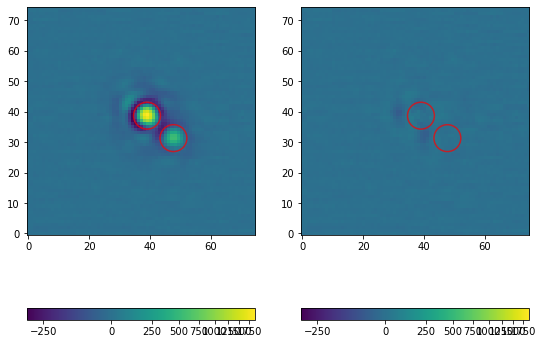

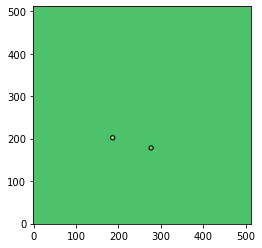

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.8738130437842 178.16613159405796 0.08721581408361506
186.22366025012695 202.20199618145642 0.10201426155335865
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.382862818915015


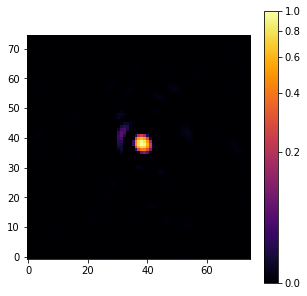

Select your target system to fit positions to


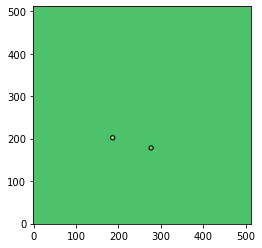

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 276.8738130437842 178.16613159405796 0.08721581408361506
186.22366025012695 202.20199618145642 0.10201426155335865
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.411760047902703
Stars found at positions
       x_0               y_0       
----------------- -----------------
38.95886921739239 38.10666385923039
47.66426119025919 30.76360661528529
Choose a reference star image to create a reference PSF from


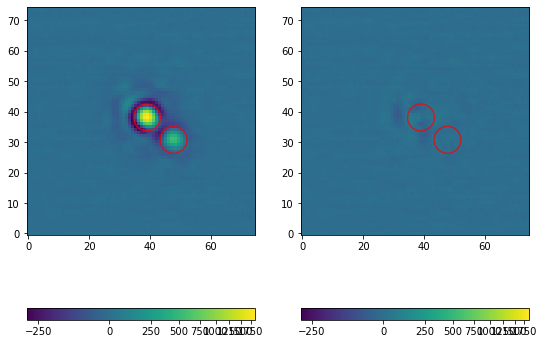

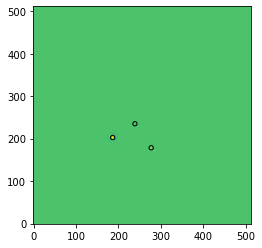

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 276.9982370987899 178.59967810893855 0.053697566232544514
186.38352767516454  202.6900774592441  0.03223788168381015
 238.7768768049698 235.13660761866583  0.04494309250289891
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.4422062573965775


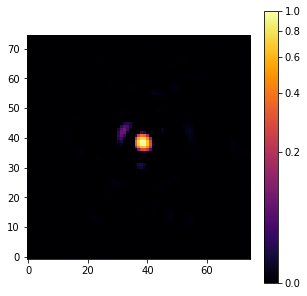

Select your target system to fit positions to


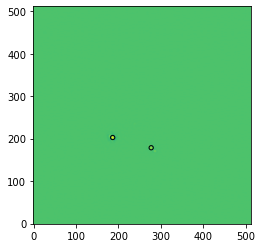

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 276.9982370987899 178.59967810893855 0.053697566232544514
186.38352767516454  202.6900774592441  0.03223788168381015
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.418688824868468
Stars found at positions
       x_0                y_0        
------------------ ------------------
39.089650323025865   38.4728249367349
 47.81690745236803 31.100845382374885
Choose a reference star image to create a reference PSF from


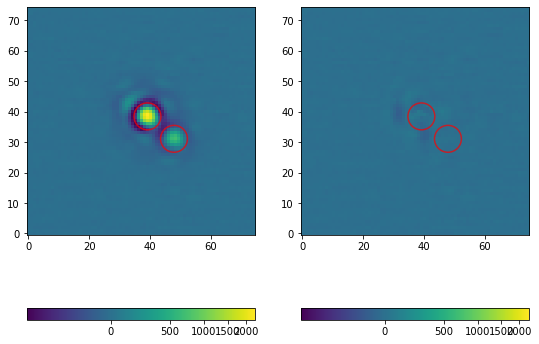

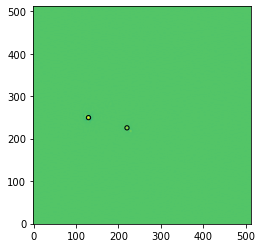

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.03782960474976  225.4905674805023 0.03306698436183596
 129.3848920176643 249.54037494765421 0.07024293517375327
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.3301339942058945


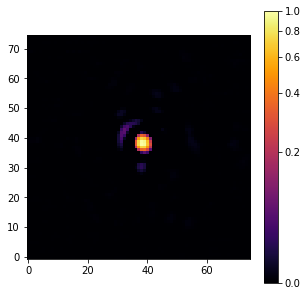

Select your target system to fit positions to


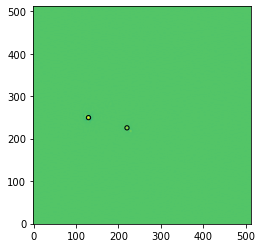

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.03782960474976  225.4905674805023 0.03306698436183596
 129.3848920176643 249.54037494765421 0.07024293517375327
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.30702732112232
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.14485061571261  38.25877537106605
 46.8653312371109 30.959735344419748
Choose a reference star image to create a reference PSF from


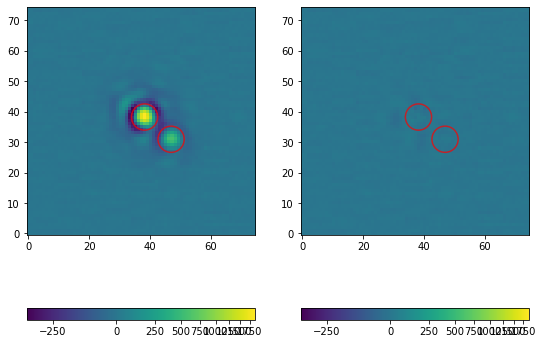

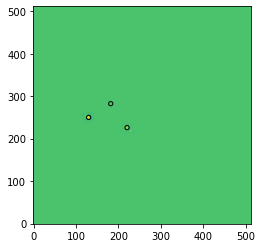

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
220.20637785822697 225.97917199734636 0.058461534001371836
129.71935236819317 249.96857477907696  0.07548978649964347
181.74977836449315  282.3577195303427  0.03768587277499014
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.455812188892708


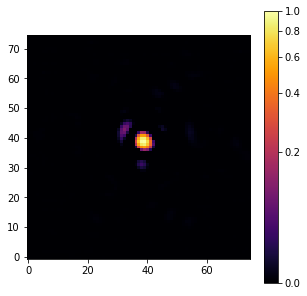

Select your target system to fit positions to


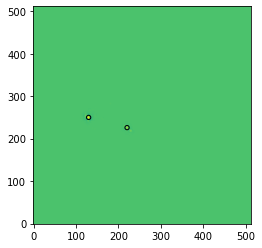

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
220.20637785822697 225.97917199734636 0.058461534001371836
129.71935236819317 249.96857477907696  0.07548978649964347
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.455888703908101
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.29770304886291  38.90237005117482
47.02254253563959 31.579628502897606
Choose a reference star image to create a reference PSF from


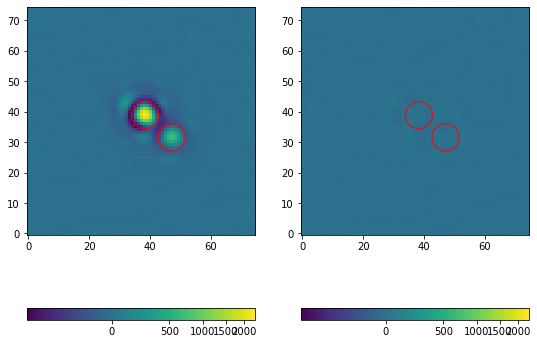

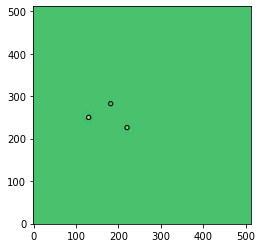

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
220.20431978755636  225.9992336875029  0.05610329153661107
 129.7573550028507 249.99667949798567  0.06746686908464321
181.71325828318874 282.29326228269974 0.014718440633418609
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.4641115396801325


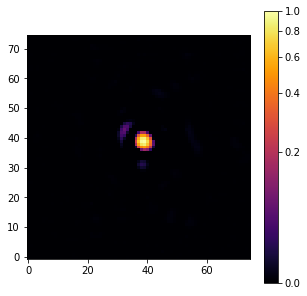

Select your target system to fit positions to


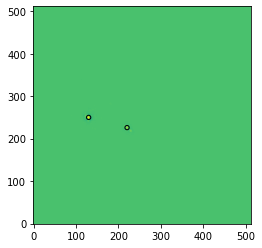

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.20431978755636  225.9992336875029 0.05610329153661107
 129.7573550028507 249.99667949798567 0.06746686908464321
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.435846268228659
Stars found at positions
       x_0                y_0       
------------------ -----------------
  38.2970253209494 38.92093053512438
47.025744345108805 31.56675392613428
Choose a reference star image to create a reference PSF from


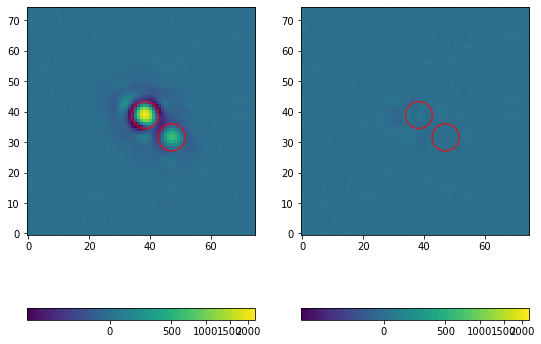

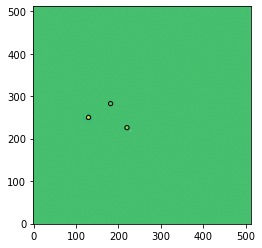

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 220.0055030301651 225.92997892935944 0.05031416857703263
129.39892543962546 249.97295715948655 0.05603890270504894
181.44801490763456  282.5199373850246 0.08225838320342395
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.4643747718452715


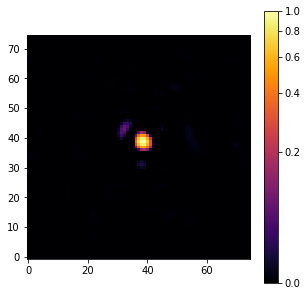

Select your target system to fit positions to


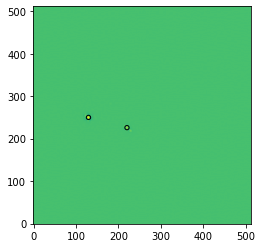

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 220.0055030301651 225.92997892935944 0.05031416857703263
129.39892543962546 249.97295715948655 0.05603890270504894
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.429685285430878
Stars found at positions
       x_0                y_0        
------------------ ------------------
38.064462534552156  38.85054799441257
46.822856537188386 31.512772748352152
Choose a reference star image to create a reference PSF from


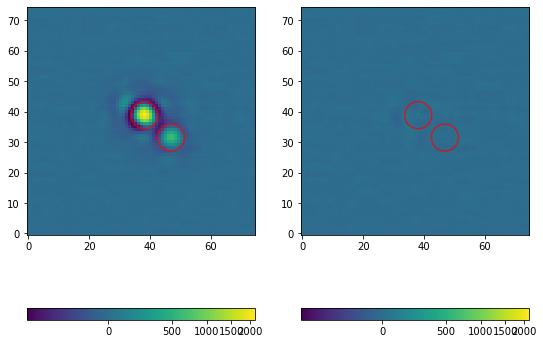

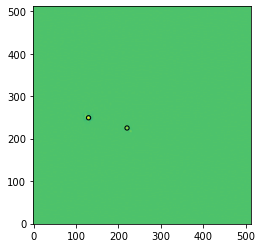

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.16474369360833   225.124560139193 0.08219052977287461
129.52814635097735 249.16800622441488 0.09696165207586432
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.402512474072381


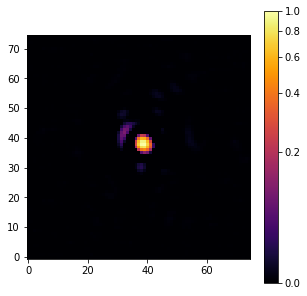

Select your target system to fit positions to


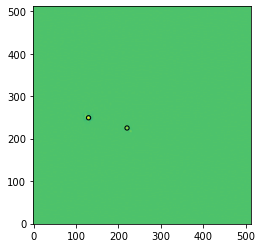

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.16474369360833   225.124560139193 0.08219052977287461
129.52814635097735 249.16800622441488 0.09696165207586432
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.338467027718707
Stars found at positions
       x_0                y_0        
------------------ ------------------
 38.26754722486108  38.01633693018253
46.984504624820325 30.721122686223588
Choose a reference star image to create a reference PSF from


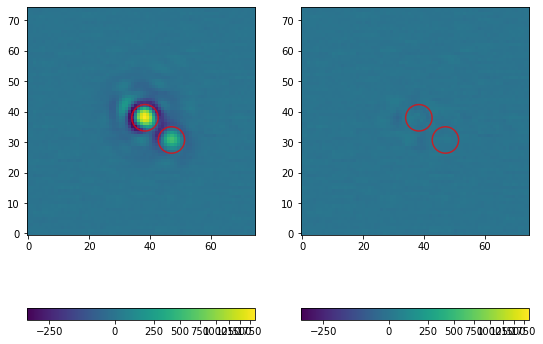

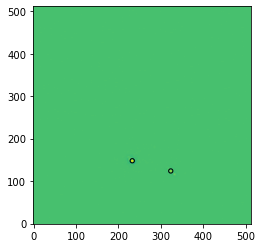

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.09735902145644 123.92584247020872 0.07245430246942468
232.47899998212569 147.95817601124367  0.0680806750017096
input the 0 indexed integer of your target from the table above: 1
target star is at  232 , 147  at FWHM 4.4822028242739975


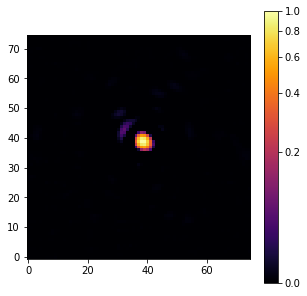

Select your target system to fit positions to


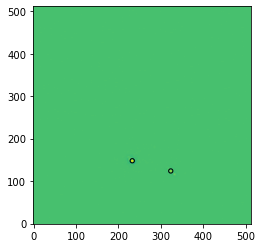

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.09735902145644 123.92584247020872 0.07245430246942468
232.47899998212569 147.95817601124367  0.0680806750017096
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 123  at FWHM 4.391019251934324
Stars found at positions
       x_0               y_0       
----------------- -----------------
38.21331173695079 38.81146459882296
 46.8847166603221 31.49839975207827
Choose a reference star image to create a reference PSF from


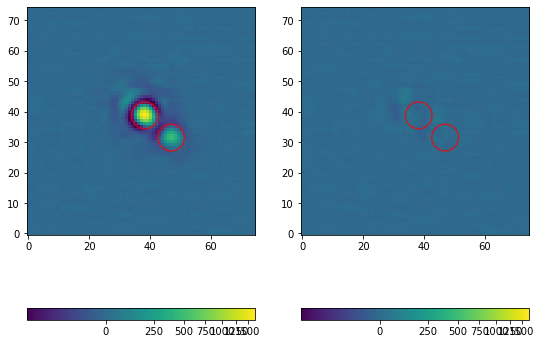

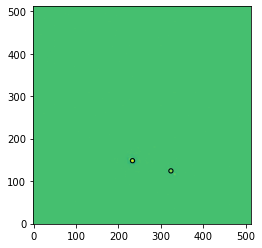

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
323.4712526799101  124.1365706770676 0.10506877607710678
233.0152056893104 148.12774411938983 0.10653169737843145
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 148  at FWHM 4.382860773563976


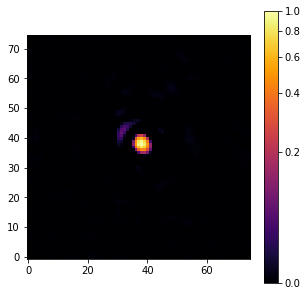

Select your target system to fit positions to


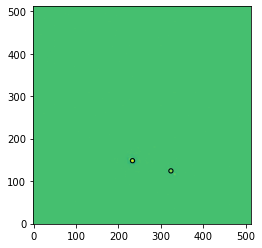

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
323.4712526799101  124.1365706770676 0.10506877607710678
233.0152056893104 148.12774411938983 0.10653169737843145
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 124  at FWHM 4.40207172578971
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.63362169961816   37.9552703871115
47.28122349006507 30.662465293376552
Choose a reference star image to create a reference PSF from


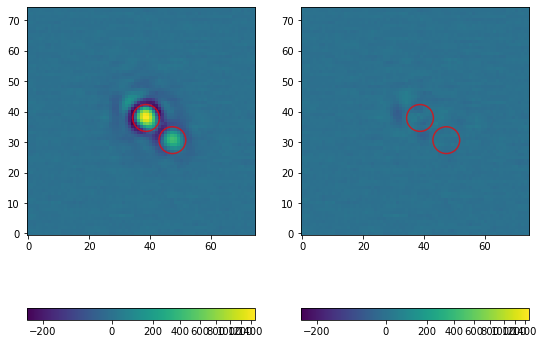

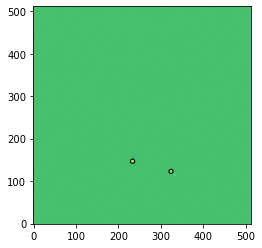

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.68765081128174 123.01609079774948  0.1218516663705051
233.09017655768375  147.0426951410288 0.09849805541600554
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 147  at FWHM 4.379223285760446


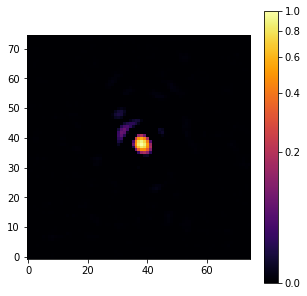

Select your target system to fit positions to


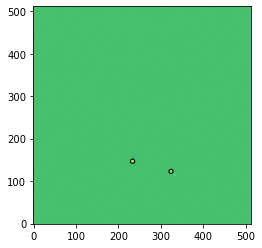

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.68765081128174 123.01609079774948  0.1218516663705051
233.09017655768375  147.0426951410288 0.09849805541600554
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 123  at FWHM 4.325395060074584
Stars found at positions
       x_0                y_0        
------------------ ------------------
 38.77311342435424    37.877470744833
47.412620678524334 30.582350459513577
Choose a reference star image to create a reference PSF from


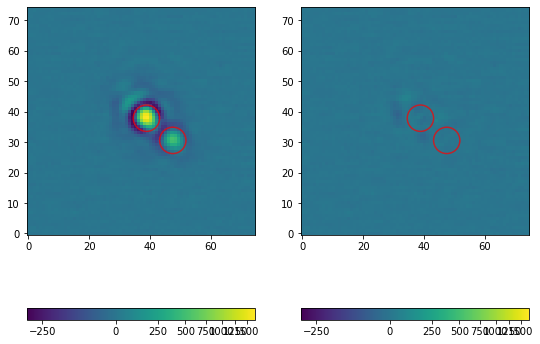

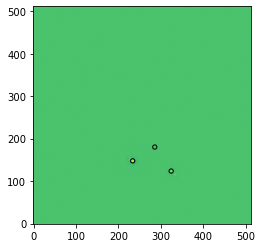

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0271651210161 123.70898378400948 0.033484042221467836
233.42271578338867 147.78140224983213 0.016513546577631828
 285.4764318774008 180.22906928149035  0.01331970609112796
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 147  at FWHM 4.381750690631776


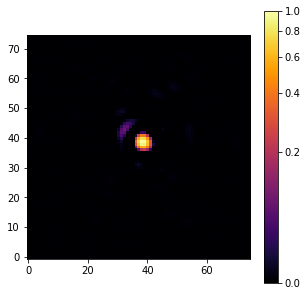

Select your target system to fit positions to


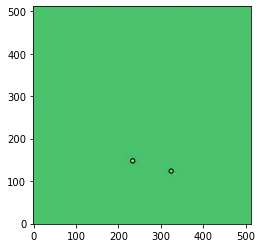

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0271651210161 123.70898378400948 0.033484042221467836
233.42271578338867 147.78140224983213 0.016513546577631828
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 123  at FWHM 4.2761004955875705
Stars found at positions
       x_0               y_0       
----------------- -----------------
38.09652060861875 38.61463047305529
 46.8012624228584 31.21912228301658
Choose a reference star image to create a reference PSF from


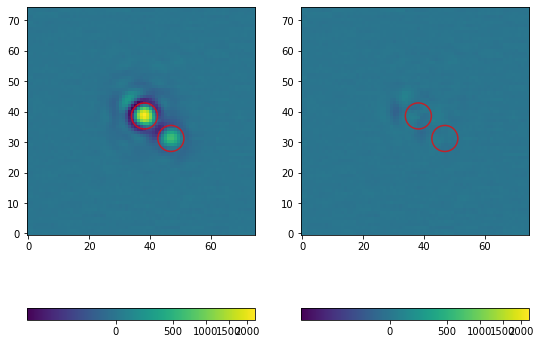

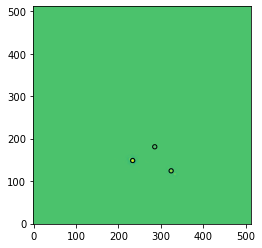

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.0196178723114 124.26334132029476 0.05285436584295873
233.41144798364454 148.52716710769909 0.04179027010160453
 285.4208391914805 180.86937670592602 0.04793626081706654
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 148  at FWHM 4.440661837809984


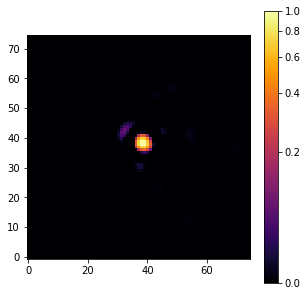

Select your target system to fit positions to


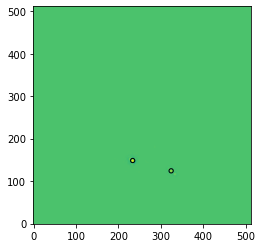

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.0196178723114 124.26334132029476 0.05285436584295873
233.41144798364454 148.52716710769909 0.04179027010160453
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 124  at FWHM 4.376364179300424
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.07332065787075  38.25013923786268
46.77330181021662 30.907479117286734
Choose a reference star image to create a reference PSF from


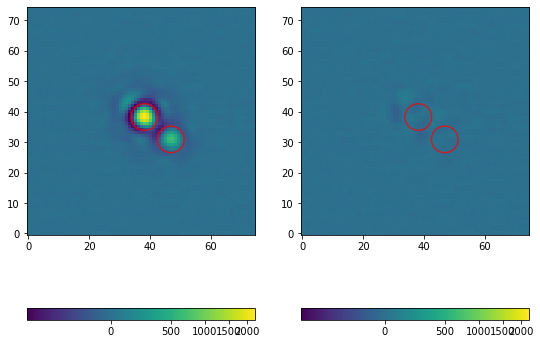

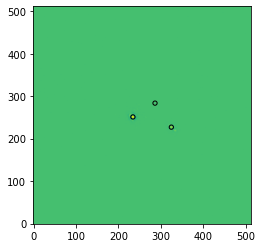

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.4656104623882 227.08124826476694  0.05875373972754217
234.01551475226992 251.10875207121228 0.055409022900690275
286.03325588613967 283.62116345089413 0.047597425154653546
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.428231083293753


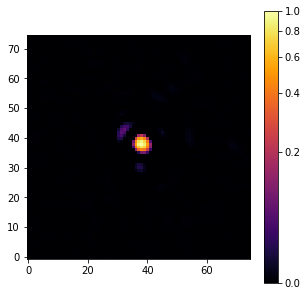

Select your target system to fit positions to


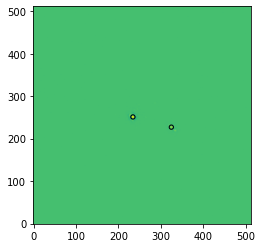

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.4656104623882 227.08124826476694  0.05875373972754217
234.01551475226992 251.10875207121228 0.055409022900690275
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 227  at FWHM 4.4080446999043374
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.60295516030938  37.97976837828198
47.29131982044862 30.639089589894162
Choose a reference star image to create a reference PSF from


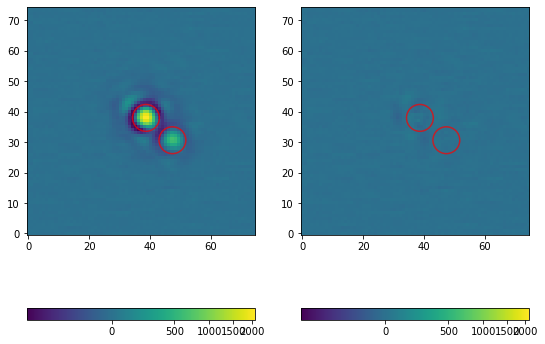

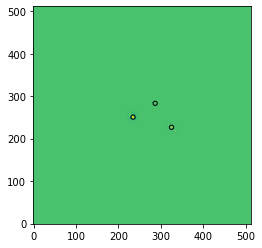

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.8939564440707  226.7097623467528 0.06788595650723328
  234.290595726332 250.78236863299125 0.02775084401431894
286.39230354303965  283.2263471561156 0.06446876324837254
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 250  at FWHM 4.417348732019121


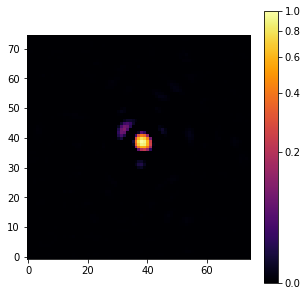

Select your target system to fit positions to


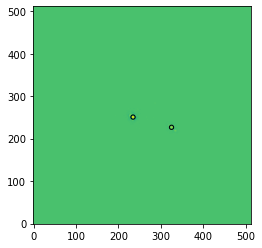

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
324.8939564440707  226.7097623467528 0.06788595650723328
 234.290595726332 250.78236863299125 0.02775084401431894
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 226  at FWHM 4.398510007424932
Stars found at positions
       x_0                y_0        
------------------ ------------------
38.969916459433506 38.597006451212664
47.672520150779356  31.21306541234965
Choose a reference star image to create a reference PSF from


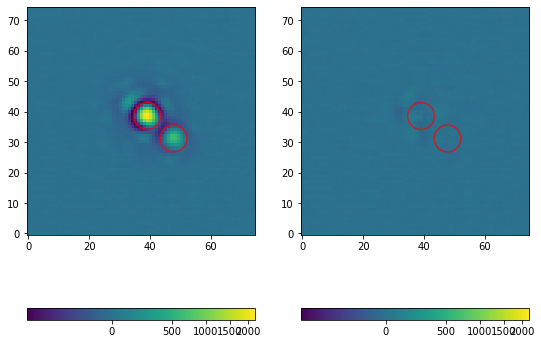

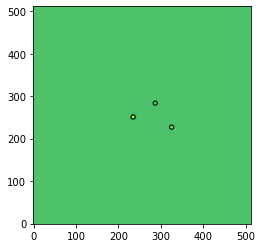

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
325.12075533361235 227.08690889884267 0.06515459192177274
234.49596037675707 251.17425917078407  0.0771757758459658
 286.5484729852232  283.6344269373022 0.02089359394147201
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.507556923263792


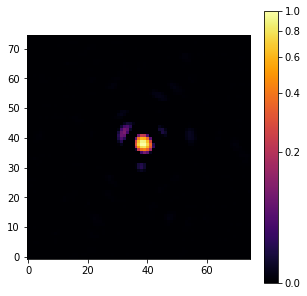

Select your target system to fit positions to


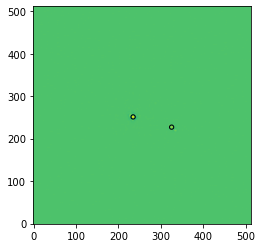

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
325.12075533361235 227.08690889884267 0.06515459192177274
234.49596037675707 251.17425917078407  0.0771757758459658
input the 0 indexed integer of your target from the table above: 0
target star is at  325 , 227  at FWHM 4.393517319460841
Stars found at positions
       x_0                y_0       
------------------ -----------------
38.202714445709105 38.01655737199504
 46.92360361351677  30.6681218293082
Choose a reference star image to create a reference PSF from


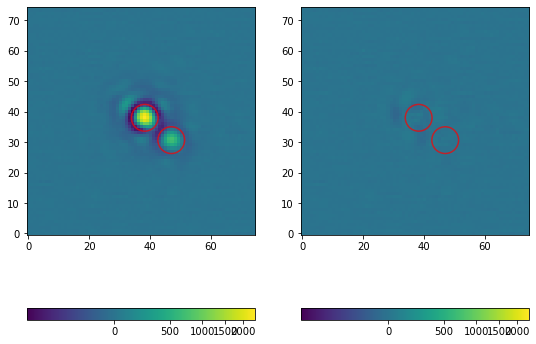

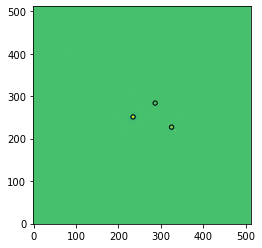

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.9869765306577 227.11388497098014 0.05674161714295549
234.33716355124324 251.18876340152627 0.06475556781765163
 286.3284115072877  283.7645332808731 0.04759644537212195
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.432826563895702


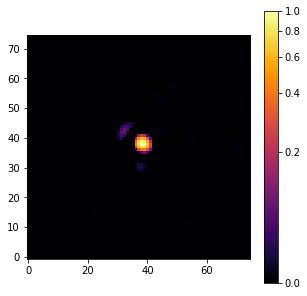

Select your target system to fit positions to


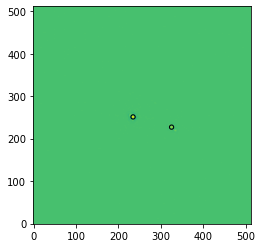

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.9869765306577 227.11388497098014 0.05674161714295549
234.33716355124324 251.18876340152627 0.06475556781765163
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 227  at FWHM 4.34901818174427
Stars found at positions
       x_0                y_0        
------------------ ------------------
39.033533301578274 38.081882322479345
 47.75531016555356  30.72911888729004
Choose a reference star image to create a reference PSF from


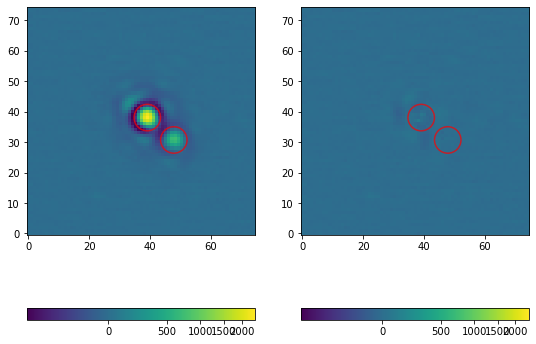

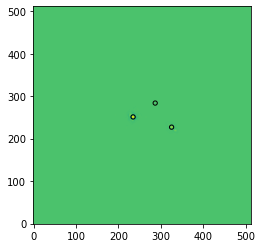

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 325.0505491824133 227.07322731655168  0.06896791692246096
234.43574959005102 251.14554129115857  0.07639621174537108
286.47861074430864 283.77981091798284 0.023974395684294457
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.4648458310660715


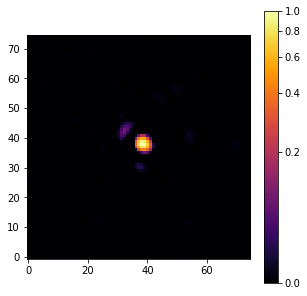

Select your target system to fit positions to


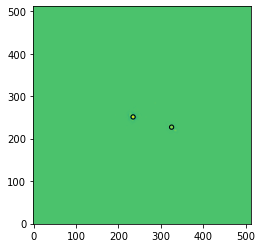

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 325.0505491824133 227.07322731655168 0.06896791692246096
234.43574959005102 251.14554129115857 0.07639621174537108
input the 0 indexed integer of your target from the table above: 0
target star is at  325 , 227  at FWHM 4.339881575632319
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.12812377725907   38.0243029212919
46.83378855985241 30.684243694605236
Choose a reference star image to create a reference PSF from


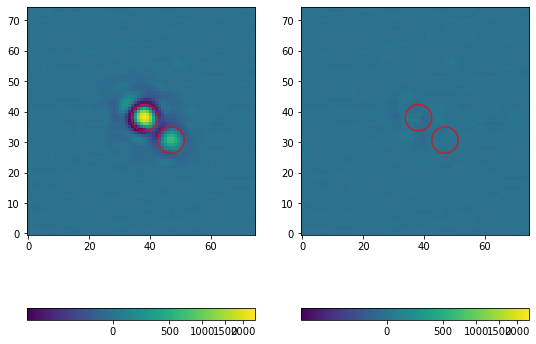

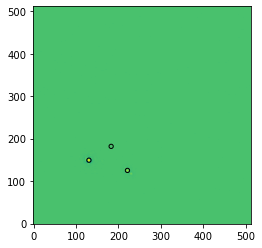

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.15173605294805 125.20864660366138  0.06280711621331768
130.48685878949078 149.29099348580615  0.08334566957145781
182.74112052209153 181.81773651778573 0.013946489320539365
input the 0 indexed integer of your target from the table above: 1
target star is at  130 , 149  at FWHM 4.503859116824231


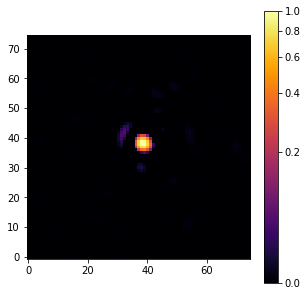

Select your target system to fit positions to


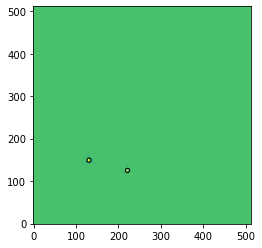

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.15173605294805 125.20864660366138 0.06280711621331768
130.48685878949078 149.29099348580615 0.08334566957145781
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 125  at FWHM 4.398057770797919
Stars found at positions
       x_0                y_0        
------------------ ------------------
38.215196434771066  38.18656648907408
 46.95420213345726 30.793314251697044
Choose a reference star image to create a reference PSF from


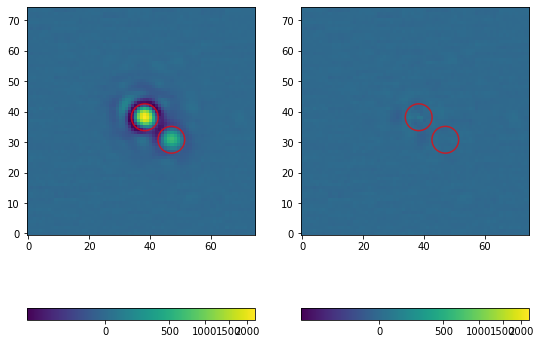

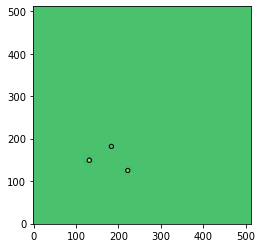

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
 221.899984676873  125.0850960887964 0.05394423669773276
131.2745379266065 149.17482861282505 0.05639283768943546
183.3650724131135 181.73975504138357 0.05323243716982884
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 149  at FWHM 4.442387879606429


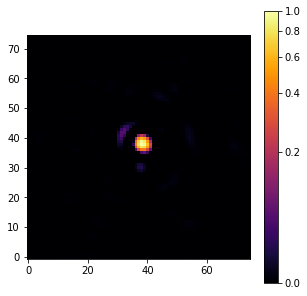

Select your target system to fit positions to


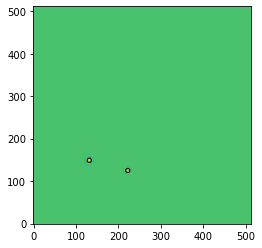

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
 221.899984676873  125.0850960887964 0.05394423669773276
131.2745379266065 149.17482861282505 0.05639283768943546
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 125  at FWHM 4.393777639837822
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.94405631196526 38.044768773222614
47.66096385425776  30.68516178454187
Choose a reference star image to create a reference PSF from


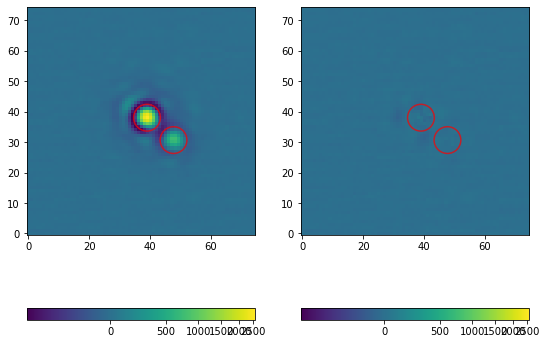

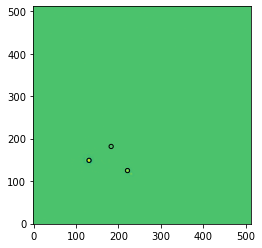

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.22715504355503 124.89444245316986 0.04123420357484938
130.72599957012673  148.9058802263444 0.06257949733234676
182.75839334747764 181.60216040615546  0.0781720451292646
input the 0 indexed integer of your target from the table above: 1
target star is at  130 , 148  at FWHM 4.35755983148843


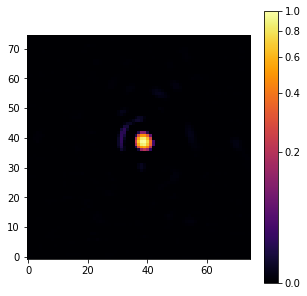

Select your target system to fit positions to


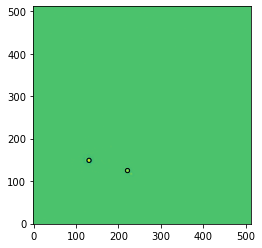

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.22715504355503 124.89444245316986 0.04123420357484938
130.72599957012673  148.9058802263444 0.06257949733234676
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.310992368146884
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.32019356688626 38.798335914951736
47.06879820807689 31.417776428177135
Choose a reference star image to create a reference PSF from


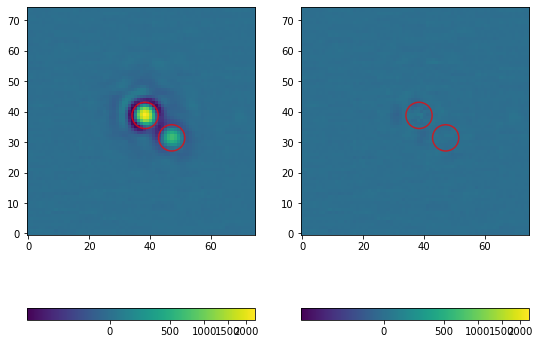

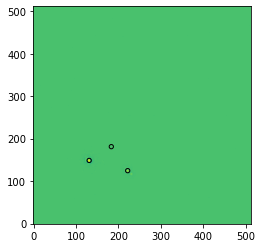

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.68903900008314 124.64682302639878  0.07839473067187334
131.02472781563017  148.7208356481338  0.03302784992289771
183.13041017103134 181.14668975438858 0.051120354105445465
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 148  at FWHM 4.355976489234479


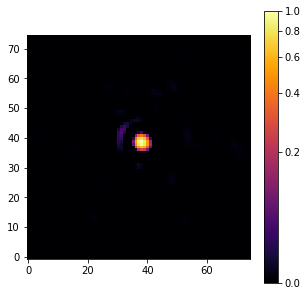

Select your target system to fit positions to


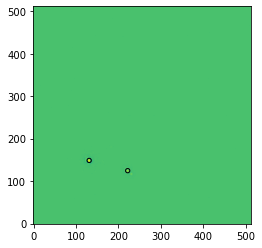

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.68903900008314 124.64682302639878 0.07839473067187334
131.02472781563017  148.7208356481338 0.03302784992289771
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.339953753703156
Stars found at positions
       x_0                y_0       
------------------ -----------------
38.721225212151055 38.55215474922883
  47.4704561813852 31.17116799204789
Choose a reference star image to create a reference PSF from


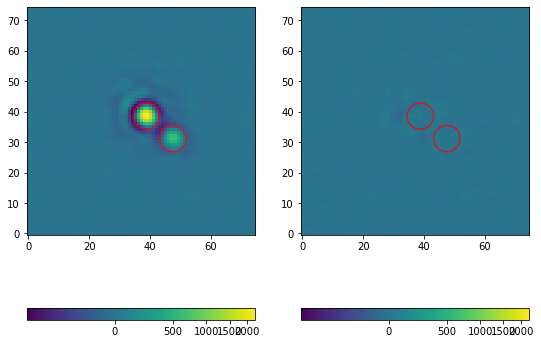

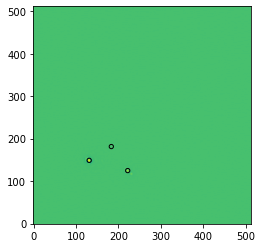

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 221.7392931221597 124.83520999210594  0.08410917353825523
131.08234234429128 148.93155804900078 0.047527203792616705
183.13210368942603 181.37795690499712  0.05584923003318508
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 148  at FWHM 4.418299355913831


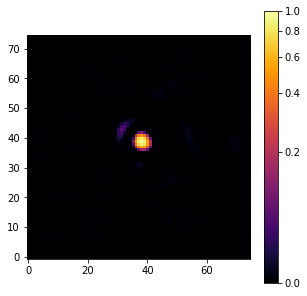

Select your target system to fit positions to


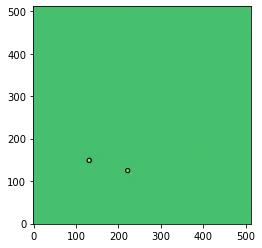

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 221.7392931221597 124.83520999210594  0.08410917353825523
131.08234234429128 148.93155804900078 0.047527203792616705
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.377734409780857
Stars found at positions
       x_0                y_0        
------------------ ------------------
38.778692126015144 38.757456393444194
47.528265478266086  31.39751796940397


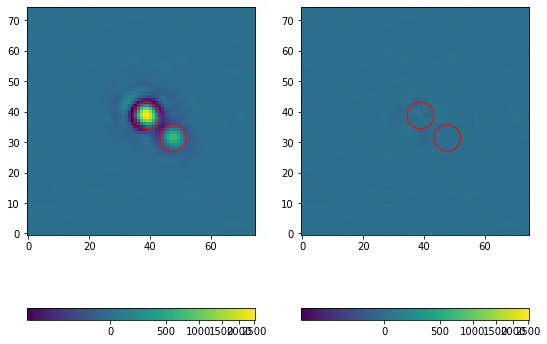

In [177]:
posishs = []
dates = []
filts = []
n = 15
for dataset in NIRC2_datasets[n:n+1]:
    print(len(dataset))
    for image in dataset:
        try:
            phot_results = NIRCLocate(image, 250, 5, 5, stampsize=75, epsfstamp=75, roundness=0.5, iterations=2, crit_sep=10, setfwhm=False, high_pass=True)
        except TypeError:
            pass
        hdr = fits.getheader(image)
        date = hdr['DATE-OBS']
        filt = hdr['FWONAME']
        dates.append(date)
        filts.append(filt)
        
        posishs.append(phot_results)

In [178]:
from astropy.table import vstack
points = vstack(posishs)

In [179]:
points

x_0,x_fit,y_0,y_fit,flux_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected,pixscale,pixerr,PAoff,PAofferr,date
float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,int32,float64,float64,float64,float64,str10
38.28067833992604,36.60359851462235,38.2554644832292,37.01746956450595,10696.029363338694,1342.550843516357,1,1,11.399068009818263,0.01639314826812457,0.01903560093364636,1,0.009971,0.005,-0.262,0.02,2020-01-04
46.996248022887855,45.337256612822806,30.91052781489006,29.612024068121123,3405.4905315696965,401.53932863440923,1,1,3.435773850434264,0.016526025055513274,0.019118030829615693,2,0.009971,0.005,-0.262,0.02,2020-01-04
38.60153885191321,36.58213511995391,38.13538089377403,37.01985977773688,12311.242791006185,1665.8235092843806,1,1,14.326625472056843,0.016238528813505793,0.019223905969580735,1,0.009971,0.005,-0.262,0.02,2020-01-04
47.27434516609603,45.31969161372509,30.860407772546534,29.628492815899165,3875.449766396023,504.4034992008185,1,1,4.317981027900702,0.016173657095289878,0.019071065228888427,2,0.009971,0.005,-0.262,0.02,2020-01-04
38.946761986282354,37.57329279719133,38.70610415190636,36.96352033181245,13368.397475741105,1928.3830069378705,1,1,16.460810088605218,0.016945175265875106,0.01815433644759317,1,0.009971,0.005,-0.262,0.02,2020-01-04
47.63433252629198,46.29205786971442,31.326568480329346,29.562549101179826,4450.877409834909,588.3818621393074,1,1,4.176648201702427,0.014103762194761981,0.015044664975411182,2,0.009971,0.005,-0.262,0.02,2020-01-04
38.95886921739239,37.5939643217409,38.10666385923039,36.997820294671094,12884.779313737228,1877.9985926960276,1,1,15.832319622474223,0.016965848727960742,0.01779115216756781,1,0.009971,0.005,-0.262,0.02,2020-01-04
47.66426119025919,46.33972317368521,30.76360661528529,29.613890504471726,4152.069183052505,564.8661235757146,1,1,4.051542379202851,0.014439058688640484,0.015087713328010262,2,0.009971,0.005,-0.262,0.02,2020-01-04
39.089650323025865,37.56892037589609,38.4728249367349,36.934266025823874,14372.585891989409,2269.5804916752886,1,1,19.0316516374111,0.01646045993391119,0.01743656433778006,1,0.009971,0.005,-0.262,0.02,2020-01-04


In [166]:
points.remove_row(14)

In [180]:
sepspas = pd.DataFrame(columns=['sep','seperr','PA','PAerr', 'date', 'filter'])
j = 0
k = 2
for i in range(len(points)//2):
    b2b3pair = points[j:k]
    calc = calcBinDist(b2b3pair)
#     calc[2] += 90
    if calc[2] <= 90:
        calc[2] += 180
    date = dates[i]
    filt = filts[i]
    calc = np.append(calc,date)
    calc = np.append(calc,filt)
    sepspas.loc[i] = calc
    j += 1
    k += 1
sepspas.loc[j] = [sepspas['sep'].median(), sepspas['seperr'].median(), sepspas['PA'].median(), sepspas['PAerr'].median(), sepspas['date'][0], sepspas['filter'][0]]


114.17444044718498 mas +/- 0.05727448036662679 mas
229.70471373990947 +/- 0.504670633331587

114.353148164134 mas +/- 0.057424180950739576 mas
49.764953694568675 +/- 0.504316456582502

114.113379062301 mas +/- 0.0572465795722543 mas
229.77109449369962 +/- 0.5027386029859247

106.3720763853758 mas +/- 0.05466227965917293 mas
46.562451453160975 +/- 0.5353118958354075

114.03234204007879 mas +/- 0.0709497925607663 mas
229.6735563473356 +/- 0.4553702322690629

114.09721196395928 mas +/- 0.0695547441809151 mas
49.475641994771564 +/- 0.4525572035695277

114.12797934084222 mas +/- 0.0680930415212329 mas
229.82603509320637 +/- 0.45477984011233547

113.91180396271669 mas +/- 0.06494325703594392 mas
50.15061002666798 +/- 0.4495028790749769

114.28481985507842 mas +/- 0.08076661894348708 mas
229.81385957028994 +/- 0.42221123835918256

122.07132519108693 mas +/- 0.08381783787609909 mas
52.5575110382247 +/- 0.3943820143756879

114.18512539377168 mas +/- 0.11529743355675252 mas
229.94974486753625 +

In [181]:
sepspas

,sep,seperr,PA,PAerr,date,filter
0,114.17444044718498,0.05727448036662679,229.70471373990947,0.504670633331587,2020-01-04,Br_gamma
1,114.353148164134,0.057424180950739576,229.76495369456867,0.504316456582502,2020-01-04,Br_gamma
2,114.113379062301,0.0572465795722543,229.77109449369962,0.5027386029859247,2020-01-04,Br_gamma
3,106.3720763853758,0.05466227965917293,226.56245145316097,0.5353118958354075,2020-01-04,Br_gamma
4,114.03234204007879,0.0709497925607663,229.6735563473356,0.4553702322690629,2020-01-04,Br_gamma
5,114.09721196395928,0.0695547441809151,229.47564199477156,0.4525572035695277,2020-01-04,Br_gamma
6,114.12797934084222,0.0680930415212329,229.82603509320637,0.45477984011233547,2020-01-04,Br_gamma
7,113.91180396271669,0.06494325703594392,230.15061002666798,0.4495028790749769,2020-01-04,Br_gamma
8,114.28481985507842,0.08076661894348708,229.81385957028994,0.42221123835918256,2020-01-04,Br_gamma
9,122.07132519108693,0.08381783787609909,232.5575110382247,0.3943820143756879,2020-01-04,Br_gamma


In [182]:
sepspas.loc[len(sepspas)-1].to_clipboard()

In [ ]:
# analyze vs DeRosa 2020

In [3]:
results = pd.read_csv('IRAFStarfind_B2-B3.csv', skiprows=1)

In [4]:
results

,sep,seperr,PA,PAerr,date,filter,true sep,true sep err,true pa,true pa err
0,116.038417,0.062800,210.220129,0.590428,2001-12-20,NB2.108,115.69,0.40,209.32,0.20
1,116.329360,0.024688,211.901431,0.093985,2004-10-03,Br_gamma,116.97,0.77,212.17,0.38
2,115.922603,0.041774,213.007236,0.453046,2005-02-16,NB2.108,116.34,0.45,212.70,0.22
3,116.367388,0.026433,213.173929,0.467795,2005-02-25,Br_gamma,116.93,0.30,212.94,0.15
4,114.945784,0.055493,216.296175,0.587710,2011-02-06,Br_gamma,114.97,0.89,219.47,0.44
5,116.616965,0.145802,159.722198,0.406617,2011-02-06,Br_gamma,116.03,0.71,219.35,0.35
6,114.452684,0.044018,227.585907,0.474191,2014-09-03,Kp,115.12,0.14,223.90,0.07
7,115.751726,1.673308,206.853296,1.804890,2014-12-06,H,115.41,0.28,223.99,0.14
8,115.755092,0.066706,224.920558,0.472626,2015-10-27,Br_gamma,115.07,0.23,224.93,0.00
9,115.277330,0.085358,225.116335,0.438175,2016-01-18,Br_gamma,115.52,0.20,225.08,0.10


In [11]:
# correct bad measurements
for i in [5,6,7,10]:
    results['sep'].iloc[i] = results['true sep'].iloc[i]
    results['seperr'].iloc[i] = results['true sep err'].iloc[i]
    results['PA'].iloc[i] = results['true pa'].iloc[i]
    results['PAerr'].iloc[i] = results['true pa err'].iloc[i]

c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
results.columns

Index(['sep', 'seperr', 'PA', 'PAerr', 'date', 'filter', 'true sep',
       'true sep err', 'true pa', 'true pa err', 'datetime', 'epoch', 'MJD'],
      dtype='object')

In [7]:
results_nonan = results.dropna()

In [13]:
results['datetime'] = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in results['date']]
results['epoch'] = [(x-results.datetime[0]).days for x in results.datetime]

In [14]:
from astropy.time import Time
results['MJD'] = [Time(x, format='datetime').mjd for x in results['datetime']]

In [15]:
outtable = pd.DataFrame()
outtable['epoch'] = results['MJD']
outtable['object'] = np.zeros(len(results))+1
outtable['sep'] = results['sep']
outtable['sep_err'] = results['seperr']
outtable['pa'] = results['PA']
outtable['pa_err'] = results['PAerr']
outtable.to_csv('B2-B3-orbitizetab.csv', index=False)
outtable

,epoch,object,sep,sep_err,pa,pa_err
0,52263.0,1.0,116.038417,0.062800,210.220129,0.590428
1,53281.0,1.0,116.329360,0.024688,211.901431,0.093985
2,53417.0,1.0,115.922603,0.041774,213.007236,0.453046
3,53426.0,1.0,116.367388,0.026433,213.173929,0.467795
4,55598.0,1.0,114.970000,0.890000,219.470000,0.440000
5,55598.0,1.0,116.030000,0.710000,219.350000,0.350000
6,56903.0,1.0,115.120000,0.140000,223.900000,0.070000
7,56997.0,1.0,115.410000,0.280000,223.990000,0.140000
8,57322.0,1.0,115.755092,0.066706,224.920558,0.472626
9,57405.0,1.0,115.277330,0.085358,225.116335,0.438175


Text(0, 0.5, 'PA ($^\\circ$)')

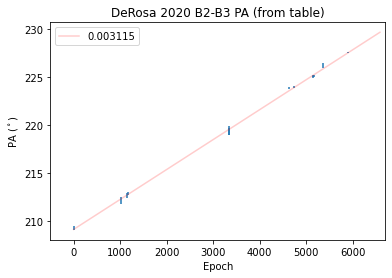

In [16]:
# DeRosa result
slope, intercept, r_value, p_value, std_err = stats.linregress(results['epoch'][0:10], results['true pa'][0:10])
plt.errorbar(results['epoch'], results['true pa'], yerr=results['true pa err'], ls='none')
plt.plot(results['epoch'], intercept + slope*results['epoch'], 'r', alpha=0.2, label=round(slope,6))
plt.legend()
plt.xlim(-500, 6700)
plt.title('DeRosa 2020 B2-B3 PA (from table)')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
# plt.savefig('derosa_pa.png', dpq=200)

Text(0, 0.5, 'PA ($^\\circ$)')

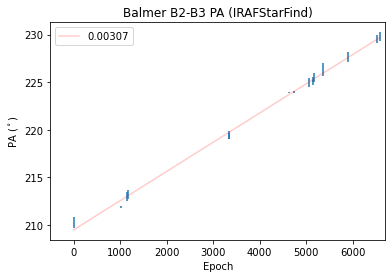

In [17]:
# my result
slope, intercept, r_value, p_value, std_err = stats.linregress(results['epoch'], results['PA'])
plt.errorbar(results['epoch'], results['PA'], yerr=results['PAerr'], ls='none')
plt.plot(results['epoch'], intercept + slope*results['epoch'], 'r', alpha=0.2, label=round(slope,6))
plt.legend()
plt.xlim(-500, 6700)
plt.title('Balmer B2-B3 PA (IRAFStarFind)')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
# plt.savefig('balmer_pa.png', dpq=200)

Text(0, 0.5, 'Balmer PA ($^\\circ$)')

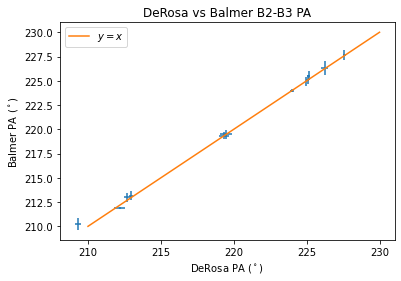

In [18]:
plt.errorbar(x=results['true pa'], y=results['PA'], xerr=results['true pa err'], yerr=results['PAerr'], ls='none')
plt.plot([210,230],[210,230], label=r'$y=x$')
plt.title('DeRosa vs Balmer B2-B3 PA')
plt.legend()
plt.xlabel(r'DeRosa PA ($^\circ$)')
plt.ylabel(r'Balmer PA ($^\circ$)')
# plt.savefig('pa_compare.png', dpq=200)

<ipython-input-19-3794c847e5c0>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpq" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('derosa_sep.png', dpq=200)


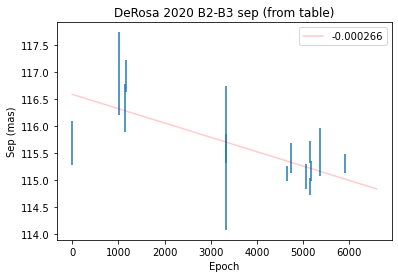

In [19]:
# DeRosa result for sep
slope, intercept, r_value, p_value, std_err = stats.linregress(results['epoch'][0:10], results['true sep'][0:10])
plt.errorbar(results['epoch'], results['true sep'], yerr=results['true sep err'], ls='none')
plt.plot(results['epoch'], intercept + slope*results['epoch'], 'r', alpha=0.2, label=round(slope,6))
plt.legend()
# plt.xlim(-500, 6700)
plt.title('DeRosa 2020 B2-B3 sep (from table)')
plt.xlabel('Epoch')
plt.ylabel('Sep (mas)')
# plt.savefig('derosa_sep.png', dpq=200)

<ipython-input-20-f044188cd82b>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpq" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('balmer_sep.png', dpq=200)


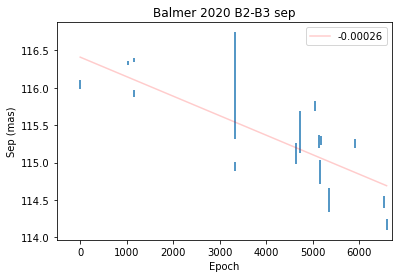

In [20]:
# my result
slope, intercept, r_value, p_value, std_err = stats.linregress(results['epoch'], results['sep'])
plt.errorbar(results['epoch'], results['sep'], yerr=results['seperr'], ls='none')
plt.plot(results['epoch'], intercept + slope*results['epoch'], 'r', alpha=0.2, label=round(slope,6))
plt.legend()
plt.xlim(-500, 6700)
plt.title('Balmer 2020 B2-B3 sep')
plt.xlabel('Epoch')
plt.ylabel('Sep (mas)')
# plt.savefig('balmer_sep.png', dpq=200)

<ipython-input-21-a4c992134376>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpq" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('sep_compare.png', dpq=200)


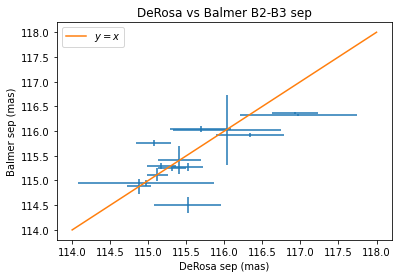

In [21]:
plt.errorbar(x=results['true sep'], y=results['sep'], xerr=results['true sep err'], yerr=results['seperr'], ls='none')
plt.plot([114,118],[114,118], label=r'$y=x$')
plt.title('DeRosa vs Balmer B2-B3 sep')
plt.legend()
plt.xlabel('DeRosa sep (mas)')
plt.ylabel('Balmer sep (mas)')
# plt.savefig('sep_compare.png', dpq=200)